Pandas is perhaps the most popular library in data science when it comes to analyzing data. It's power comes from pulling all the data in the memory for fast access and creating DataFrames to provide a great way to visualize, slice and dice data. While this way of handling memory limits its appropriateness with very large datasets, Pandas is the King when it comes to large datasets up until the mid-single digits in GB. Apart from being an analytical library, it also gives the user the ability to create quick visualizations. True, it doesn't have the flexibility of a complete visualization library like Matplotlib, this feature is incredibly useful visualization in the earlier stages of analysis and modeling. In this post we'll look at some of the more common visualization techniques in the way of exploring a dataset on New York City street tree census from 2015. So let's get started without wasting any more digital ink.

As usual, we start by importing the Pandas library and loading the data...

``` import pandas as pd ```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt

In [2]:
tree_data=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [3]:
tree_data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [4]:
tree_data.columns.values

array(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems',
       'root_stone', 'root_grate', 'root_other', 'trunk_wire',
       'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
       'brch_other', 'address', 'postcode', 'zip_city', 'community board',
       'borocode', 'borough', 'cncldist', 'st_assem', 'st_senate', 'nta',
       'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp',
       'y_sp', 'council district', 'census tract', 'bin', 'bbl'],
      dtype=object)

In [5]:
tree_data=tree_data[['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems']].copy(deep=True)

In [6]:
#tree_data.to_csv('nyc_tree_census_2015.csv',index=0)

In [7]:
treeCleanedData=pd.read_csv('nyc_tree_census_2015.csv')

In [8]:
treeCleanedData.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones


In [9]:
dbhStatusHealthSpecies=treeCleanedData[['tree_id','tree_dbh','status','health','spc_latin']].copy(deep=True)

In [10]:
dbhStatusHealthSpecies.head()

,tree_id,tree_dbh,status,health,spc_latin
0,180683,3,Alive,Fair,Acer rubrum
1,200540,21,Alive,Fair,Quercus palustris
2,204026,3,Alive,Good,Gleditsia triacanthos var. inermis
3,204337,10,Alive,Good,Gleditsia triacanthos var. inermis
4,189565,21,Alive,Good,Tilia americana


In [11]:
dbhStatusHealthSpecies[['spc_latin']].value_counts().head(10)

spc_latin                         
Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
Tilia cordata                         29742
Prunus                                29279
Zelkova serrata                       29258
Ginkgo biloba                         21024
Styphnolobium japonicum               19338
dtype: int64

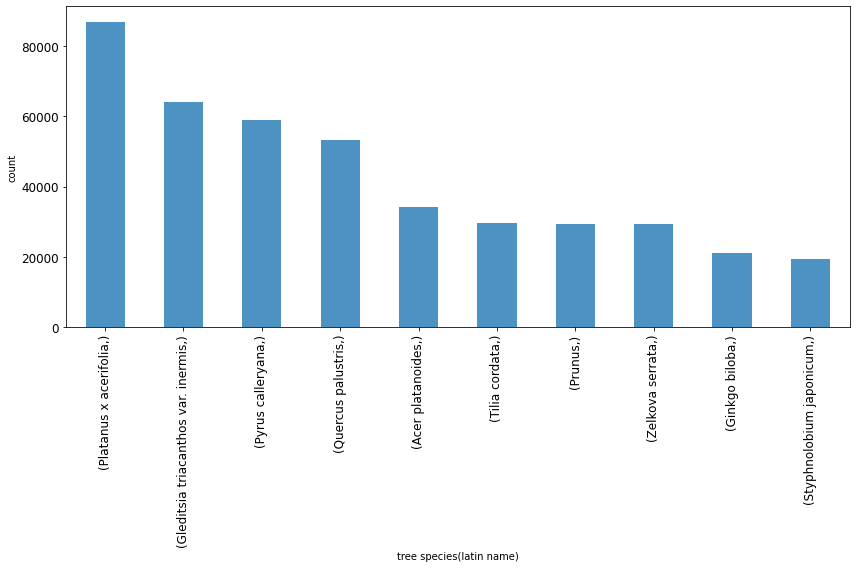

In [12]:
dbhStatusHealthSpecies[['spc_latin']].value_counts().head(10).plot.bar(xlabel='tree species(latin name)',ylabel='count',alpha=0.8,fontsize=12,figsize=(12,8))
#plt.rcParams.update({'axes.labelsize': 20})
plt.tight_layout()
plt.savefig('vbar without rcParams.png',pad_inches=3)

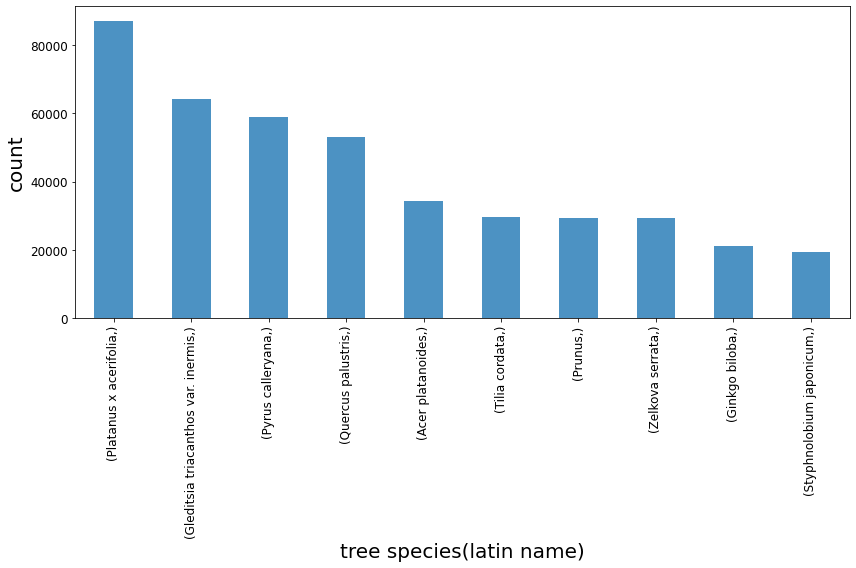

In [21]:
dbhStatusHealthSpecies[['spc_latin']].value_counts().head(10).plot.bar(xlabel='tree species(latin name)',ylabel='count',alpha=0.8,fontsize=12,figsize=(12,8))
plt.rcParams.update({'axes.labelsize': 18})
plt.tight_layout()
plt.savefig('vbar with rcParams.png',pad_inches=3)

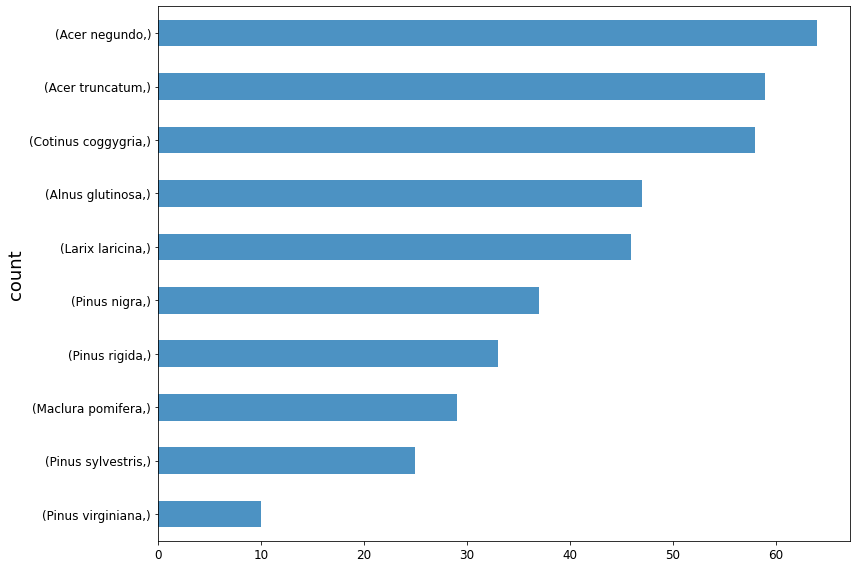

In [14]:
pd.DataFrame(dbhStatusHealthSpecies[['spc_latin']].value_counts()).sort_values(by=[0]).head(10).plot.barh(xlabel='count',ylabel='tree species(latin name)',alpha=0.8,fontsize=12,figsize=(12,8)).get_legend().remove()
plt.rcParams.update({'axes.labelsize': 20})
plt.tight_layout()
plt.savefig('hbar with rcParams.png',pad_inches=3)

In [15]:
dbhStatusHealthSpecies[['status']].value_counts()

status
Alive     652173
Stump      17654
Dead       13961
dtype: int64

<AxesSubplot:>

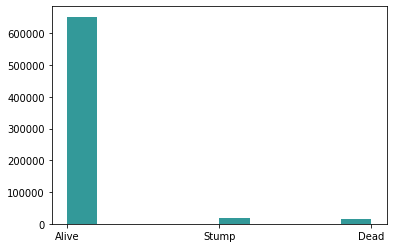

In [16]:
dbhStatusHealthSpecies['status'].hist(grid=False,color='teal',alpha=0.8)

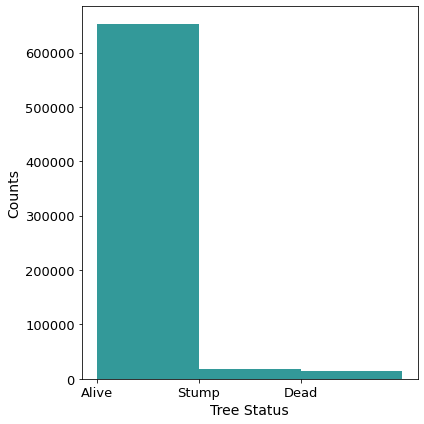

In [23]:
ax=dbhStatusHealthSpecies['status'].hist(bins=range(4),align='mid',grid=False,color='teal',alpha=0.8,figsize=(6,6));
#ax.set(xticks=['Alive','Stump','Dead'])
ax.tick_params(labelsize=13)
#ax.set_xticklabels(['Alive','Stump','Dead'],horizontalalignment='center')
ax.set_xlabel('Tree Status',fontsize=14,loc='center')
ax.set_ylabel('Counts', fontsize=14)

plt.tight_layout()
plt.savefig('histogram.png',pad_inches=3)

spc_latin                         
Platanus x acerifolia                 87014  
Gleditsia triacanthos var. inermis    64264  
Pyrus calleryana                      58931  
Quercus palustris                     53185  
Acer platanoides                      34189  
Tilia cordata                         29742  
Prunus                                29279  
Zelkova serrata                       29258  
Ginkgo biloba                         21024  
Styphnolobium japonicum               19338  
dtype: int64  

dbhStatusHealthSpecim

In [18]:
df=dbhStatusHealthSpecies[(dbhStatusHealthSpecies['spc_latin']=='Platanus x acerifolia') | (dbhStatusHealthSpecies['spc_latin']=='Styphnolobium japonicum')]

In [19]:
df.drop('tree_id',axis=1,inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


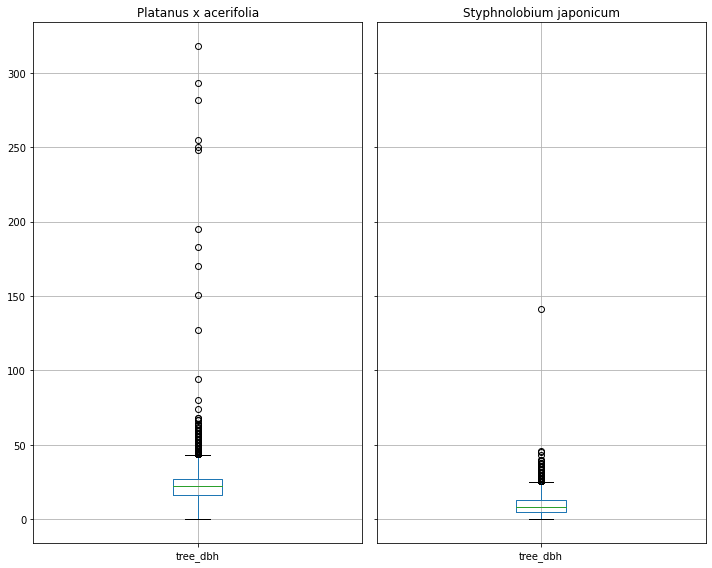

In [20]:
df.groupby('spc_latin')[['tree_dbh']].boxplot(figsize=(10,8));
plt.tight_layout()
plt.savefig('boxplot.png',pad_inches=3)